# 합성곱 신경망을 사용한 이미지 분류

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/8-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

#수업시간에 배운 CNN을 이용하여 이미지를 분류해 보자!!!


데이터 셋 정보: http://yann.lecun.com/exdb/mnist/

## MNIST 데이터 셋 읽어오기

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt



(train_input, train_target), (test_input, test_target) = \
    keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


##로드한 데이터의 shape을 확인하시오 (샘플 수: 60000, 28 x 28).
##데이터 셋의 클래스 수를 확인하시오 (numpy unique() 활용 - 7일차 교육 MNIST 실습의 데이터 준비 슬라이드 참고)

In [2]:
print(train_input.shape, test_input.shape)
print(np.unique(train_target, return_counts = True))

(60000, 28, 28) (10000, 28, 28)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


## 이미지에 깊이 1을 추가하고, 픽셀값을 0~1값으로 정규화하시오


In [3]:
#이미지 정규화 (전체 픽셀을 각각 255.0로 나눔)

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

##데이터 세트를 훈련데이터 (80%)와 검증세트로 분리하시오

In [4]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

#분류가 잘 되었는지 확인하시오 (훈련 세트 = 48000, 검증세트 = 12000)

In [5]:
#shape를 출력

print(train_scaled.shape, val_scaled.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1)


## matplotlib의 imshow() 메소드를 사용하여 정규화된 훈련세트의 5번째 인덱스의 이미지를 color bar와 함께 출력하시오. 

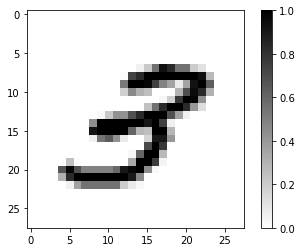

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_scaled[5].reshape(28,28), cmap="gray_r") #변수명은 변경 가능
plt.colorbar()
plt.show()

## 합성곱 신경망 만들기

In [7]:
model = keras.Sequential()

##첫번째 합성곱 층을 생성후 모델에 추가하시오.
필터 수: 32개\
필터 (커널) 사이즈: 3 x 3 x 1\
활성화 함수: ReLU\
패딩: same padding\
stride: 1\
input_shape는 데이터 특성에 맞게 지정

In [8]:
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28,28,1)))

## 2x2 최대 풀링 (max pooling) 층을 추가하시오

In [9]:
model.add(keras.layers.MaxPooling2D(2))

##두번째 합성곱 층을 생성 후 모델에 추가하시오
필터 수: 64개\
필터 (커널) 사이즈: 3 x 3 x 32\
활성화 함수: ReLU\
패딩: same padding\
stride: 1

In [10]:
model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))

## 2x2 최대 풀링 (max pooling) 층을 추가하시오.
stride: 2

In [11]:
model.add(keras.layers.MaxPooling2D(2))

## Flatten 층을 추가하고, 출력을 위한 Dense 층 두개를 추가하시오.
## Flatten 층과 첫번째 Dense 층 사이에 Dropout 층을 추가하시오 (Dropout율: 30%) 
첫번째 Dense 층의 뉴런 갯수: 100개\
첫번째 Dense 층의 활성화 함수: ReLU\
두번째 Dense 층의 뉴런 갯수: 데이터 특성에 맞게 설정\
두번째 Dense 층의 활성화 함수: Softmax


In [12]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation = 'softmax'))

##model.summary()를 사용하여 모델이 잘 구성되었는지 확인

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

##utils.plot_model()을 사용하여 모델이 잘 구성되었는지 확인

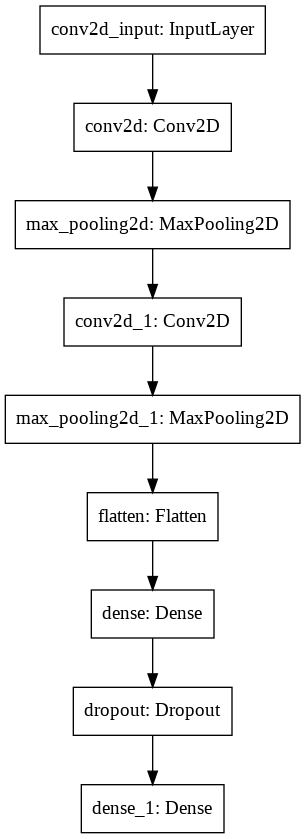

In [14]:
keras.utils.plot_model(model)

#아넝리ㅏㅁㄴ;ㅔㄹㄴㅁ라ㅓㅣㅁ;

## 모델 컴파일과 훈련
optimizer: adam\
손실함수: 다중분류를 위한 함수로 지정\
accuracy 메트릭 추가

In [15]:
#accuracy는 매개변수를 통해 별도 추가

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

## ModelCheckPoint 콜백 및 Early_stopping 콜백 사용을 사용하여 최적의 모델을 찾고 저장하시오.
##에포크는 적당히 큰 값으로 설정 (예: 30)
## patience: 2

In [16]:
##modelCheckPoint 콜백과 Early_stopping 콜백은 리스트로 동시에 전달 가능
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

history = model.fit(train_scaled, train_target, epochs = 30, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/30
1500/1500 [==============================] - 36s 3ms/step - loss: 0.1952 - accuracy: 0.9408 - val_loss: 0.0547 - val_accuracy: 0.9849
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0648 - accuracy: 0.9797 - val_loss: 0.0533 - val_accuracy: 0.9839
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0461 - accuracy: 0.9857 - val_loss: 0.0371 - val_accuracy: 0.9892
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0376 - accuracy: 0.9884 - val_loss: 0.0374 - val_accuracy: 0.9889
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0280 - accuracy: 0.9915 - val_loss: 0.0343 - val_accuracy: 0.9904
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0239 - accuracy: 0.9921 - val_loss: 0.0346 - val_accuracy: 0.9901
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0324 - val_accuracy

## matplotlib를 사용하여 학습 세트와 검증세트의 Loss율을 확인하시오.

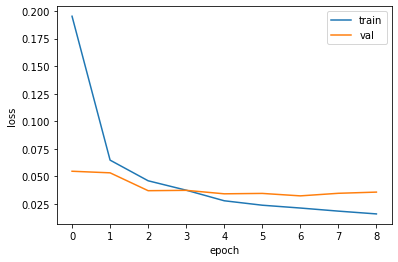

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## model.evaluate()를 사용하여 검증 세트에 대한 성능을 측정하시오

In [18]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.0324 - accuracy: 0.9908


[0.03241397440433502, 0.9907500147819519]

##검증세트의 두번째 (인덱스 1) 이미지 출력

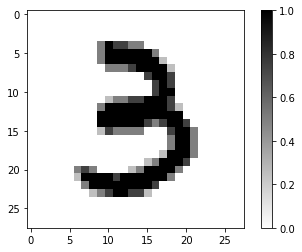

In [19]:
plt.imshow(val_scaled[1].reshape(28,28), cmap='gray_r')
plt.colorbar()
plt.show()

## 검증세트 두번째 (인덱스 1) 샘플의 예측결과를 확인

In [20]:
#predict()메소드를 사용하면 됩니다. 수업자료 참고

preds = model.predict(val_scaled[1:2])
print(preds)

[[6.8687483e-17 1.4232283e-12 1.7424285e-13 1.0000000e+00 6.2842293e-15
  7.5753043e-10 9.4823668e-18 1.6664134e-11 8.0170294e-11 8.6524399e-10]]


## 위 예측결과를 그래프로 출력 후 확인

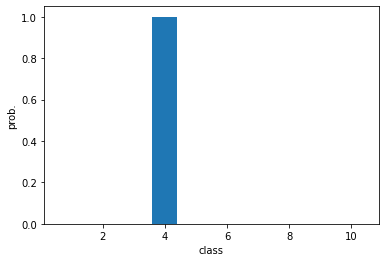

In [21]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [22]:
classes = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five',
           'Six', 'Seven', 'Eight', 'Nine']

In [23]:
import numpy as np
print(classes[np.argmax(preds)])

Three


##테스트 세트에 대한 성능을 평가해보자 (evaluate() 사용)

In [24]:
#테스트 데이터도 정규화가 필요합니다.
#성능평가시 evaluate()를 사용합니다.

test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.0293 - accuracy: 0.9910


[0.029269468039274216, 0.9909999966621399]